In [288]:
import numpy as np
import pylab as pl
import pandas as pd
%matplotlib inline

This is assignment 1 for DATA201 in 2023. There are four assignments, and we will take your best three marks for them, so you can drop one without penalty. 

Use this notebook as the basis for your solution, complete the code parts, and upload the notebook to Nuku. The due date is Thursday 3rd August before midnight. It can be submitted up to 3 days late (Saturday night) with a 10% penalty on your mark per day. So no need to ask for an extension! 

Please note that all the assignments in the course are individual. It's fair enough to talk about the assignment with each other, and to discuss strategies, but the final result must be your own work. If we spot identical answers we will treat them as plagiarism. 

Ponui Island in the Hauraki Gulf has a healthy population of North Island Brown Kiwi (Apteryx mantelli). Since around 2001, my collaborator Isabel Castro has been studying a subset of this population. She and I now co-manage this project. We have around 50 birds that have radio telemetry transmitters, so that we can catch them, monitor their health, and sometimes use them in experiments looking at their behaviour. 

In this assignment, and also assignment 3, you are going to look at some of the annual measurements that we and our students and various volunteers have made of the birds. Please don't share this data, we are still using it as the basis for scientific papers.

We start by reading in the dataset:

In [289]:
df = pd.read_excel('PonuiMeasurements.xlsx')
df.head()

,Name,sex,Date,Bill length,Bill length.1,Bill length.2,ts L_1,ts L_2,ts L_3,ts W_1,ts W_2,ts W_3,ts D_1,ts D_2,ts D_3,Body Condition (0-4),Weight
0,Ivan,m,2012-03-18,91.6,NaN,NaN,89.5,NaN,NaN,10.9,NaN,NaN,13.2,NaN,NaN,NaN,1920.0
1,Genesis,m,2012-03-18,92.5,NaN,NaN,88.2,NaN,NaN,13.0,NaN,NaN,15.6,NaN,NaN,NaN,2180.0
2,Dario,m,2012-03-18,89.5,NaN,NaN,87.5,NaN,NaN,12.7,NaN,NaN,14.3,NaN,NaN,NaN,2280.0
3,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0
4,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0


(1) Get the unique names of the birds, and work out how many datapoints there are for each bird. Then pick the 3 male and 3 female birds with the highest number of measurements (6 marks)

I did this by: 
* storing the unique names
* looping over those names, extracting the rows that match that name
* making a new dataframe that holds those names, together with the sex of the bird, and the count of the number of rows that match (use `len()` to get the number of rows in a dataframe). Remember that you can make a Python list of lists using
`nameoflist.append([])` and turn a Python list into a dataframe using `pd.DataFrame(nameoflist)`
* sorting that dataframe using `pd.sort_values()` by the count column

I've printed the first 10 elements of that dataframe so you can see the output

In [290]:
#checking which birds have the highest counts
nums = df['Name'].value_counts()
sortednums = nums.sort_values(ascending=False)
sortednums

Ponui             28
Clea              16
Dario             16
Camila            16
Linda             16
                  ..
Chick              1
Kauri 7 - 2020     1
Chick (2022)       1
Kauri 6 - 2020     1
AnaMaria           1
Name: Name, Length: 114, dtype: int64

In [291]:
#making a duplicate df
ndf = df.copy()
#creating a new column in the duplicate df called 'counts' that stores the counts of each kind of bird
ndf['counts'] = ndf['Name'].map(df['Name'].value_counts())
#sorting the duplicate df by the new column in descending order
ndf.sort_values(by='counts', ascending=False)

,Name,sex,Date,Bill length,Bill length.1,Bill length.2,ts L_1,ts L_2,ts L_3,ts W_1,ts W_2,ts W_3,ts D_1,ts D_2,ts D_3,Body Condition (0-4),Weight,counts
401,Ponui,m,2020-03-18,91.38,91.3,90.74,90.89,91.14,91.37,11.37,11.04,11.17,14.26,14.86,14.9,2,1620.0,28
435,Ponui,m,2020-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1980.0,28
522,Ponui,m,2021-03-16,90.50,90.7,91.10,92.70,92.10,92.90,11.90,12.20,12.20,NaN,NaN,NaN,2,1780.0,28
510,Ponui,m,2021-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1760.0,28
261,Ponui,m,2017-03-24,91.70,91.6,91.10,86.40,86.00,85.90,13.00,12.60,12.00,16.90,17.00,17.9,2,2040.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Kauri 4 - 2020,unk,2020-06-05,82.06,NaN,NaN,86.23,NaN,NaN,12.66,NaN,NaN,16.69,NaN,NaN,2,1980.0,1
212,Cindy,f,2016-04-06,118.30,118.4,118.20,90.00,89.90,90.10,12.50,13.20,12.50,17.30,16.90,26.9,3,2240.0,1
745,Camilo,m,2023-03-19,84.70,84.1,84.30,82.40,82.00,82.70,12.50,12.60,12.20,16.30,16.50,17.1,2,2100.0,1
91,Becca,f,2013-03-21,71.80,71.9,NaN,73.40,74.70,73.10,9.60,9.50,10.20,10.60,11.10,10.6,NaN,818.0,1


In [292]:
#dropping the duplicates so we can see which birds have the top values 
ndf.drop_duplicates(subset='Name', inplace=True)
ndf.sort_values(by='counts', ascending=False)

,Name,sex,Date,Bill length,Bill length.1,Bill length.2,ts L_1,ts L_2,ts L_3,ts W_1,ts W_2,ts W_3,ts D_1,ts D_2,ts D_3,Body Condition (0-4),Weight,counts
3,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0,28
38,Linda,f,2012-04-07,116.5,116.7,NaN,91.6,92.6,92.5,13.4,13.0,13.2,18.5,19.1,18.6,NaN,2400.0,16
6,Salome,f,2012-03-21,110.0,NaN,NaN,91.9,91.9,NaN,13.1,13.1,NaN,16.6,16.3,NaN,NaN,2380.0,16
19,Paul,m,2012-03-23,93.1,93.8,NaN,86.3,86.8,NaN,12.8,12.9,NaN,16.5,16.2,NaN,NaN,2000.0,16
27,Clea,f,2012-03-23,126.2,NaN,NaN,98.7,97.4,NaN,13.1,13.2,NaN,17.1,17.1,NaN,NaN,2450.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Robyn,f,2013-03-20,125.6,125.4,NaN,99.3,99.4,99.3,13.3,13.3,13.4,17.5,17.6,17.7,4,2350.0,1
212,Cindy,f,2016-04-06,118.3,118.4,118.2,90.0,89.9,90.1,12.5,13.2,12.5,17.3,16.9,26.9,3,2240.0,1
91,Becca,f,2013-03-21,71.8,71.9,NaN,73.4,74.7,73.1,9.6,9.5,10.2,10.6,11.1,10.6,NaN,818.0,1
94,Tui,unk,2013-05-03,87.0,87.2,NaN,94.3,91.2,91.0,12.9,12.0,12.0,16.8,16.1,16.0,NaN,2000.0,1


In [293]:
#getting the top 10 birds with the highest counts -- male and female alike
sortedndf = ndf.sort_values(by='counts', ascending=False).head(10)
sortedndf

,Name,sex,Date,Bill length,Bill length.1,Bill length.2,ts L_1,ts L_2,ts L_3,ts W_1,ts W_2,ts W_3,ts D_1,ts D_2,ts D_3,Body Condition (0-4),Weight,counts
3,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0,28
38,Linda,f,2012-04-07,116.5,116.7,NaN,91.6,92.6,92.5,13.4,13.0,13.2,18.5,19.1,18.6,NaN,2400.0,16
6,Salome,f,2012-03-21,110.0,NaN,NaN,91.9,91.9,NaN,13.1,13.1,NaN,16.6,16.3,NaN,NaN,2380.0,16
19,Paul,m,2012-03-23,93.1,93.8,NaN,86.3,86.8,NaN,12.8,12.9,NaN,16.5,16.2,NaN,NaN,2000.0,16
27,Clea,f,2012-03-23,126.2,NaN,NaN,98.7,97.4,NaN,13.1,13.2,NaN,17.1,17.1,NaN,NaN,2450.0,16
45,Camila,f,2012-04-10,124.7,125.5,124.4,100.7,101.1,101.3,13.6,13.3,NaN,20.4,19.9,19.8,NaN,2800.0,16
2,Dario,m,2012-03-18,89.5,NaN,NaN,87.5,NaN,NaN,12.7,NaN,NaN,14.3,NaN,NaN,NaN,2280.0,16
15,Marc,m,2012-03-22,88.6,NaN,NaN,85.0,85.2,85.6,13.2,12.5,12.2,16.1,16.7,NaN,NaN,2150.0,15
39,Jaeden,m,2012-04-07,89.5,89.6,90.0,77.2,80.4,81.6,12.4,12.5,12.3,16.7,16.7,16.7,NaN,2235.0,15
20,Minnie,f,2012-03-23,128.0,128.0,NaN,95.0,95.3,NaN,15.9,16.0,NaN,19.7,19.1,NaN,NaN,3200.0,15


In [294]:
#getting the top 3 male birds with the highest counts
malebirds = sortedndf[sortedndf['sex']=='m'].head(3)

In [295]:
#getting the top 3 female birds with the highest counts
femalebirds = sortedndf[sortedndf['sex']=='f'].head(3)

In [296]:
#making a new df that has the information on the top 3 male and top 3 female birds
top6 = malebirds.append(femalebirds)
top6[['Name', 'sex', 'counts']]

/var/folders/g7/_zvlq8f10_s2zyvyz7m6dysh0000gn/T/ipykernel_32313/3343687532.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top6 = malebirds.append(femalebirds)


,Name,sex,counts
3,Ponui,m,28
19,Paul,m,16
2,Dario,m,16
38,Linda,f,16
6,Salome,f,16
27,Clea,f,16


In [241]:
#this was part of the original assignment file 
#it was retained to cross check my output
#this output is identical to sortedndf.head(10)
data[:10]

,0,1,2
3,Ponui,m,28
37,Linda,f,16
5,Salome,f,16
18,Paul,m,16
26,Clea,f,16
44,Camila,f,16
2,Dario,m,16
14,Marc,m,15
38,Jaeden,m,15
19,Minnie,f,15


In [243]:
#this output was also part of the original assignment file and was retained for cross-checking purposes

['Dario' 'Ponui' 'Salome' 'Paul' 'Clea' 'Linda']


(2) For the 6 birds you've identified, plot a box and whisker plot for their weights. (2 marks)

In [297]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Weight'}, xlabel='Name'>

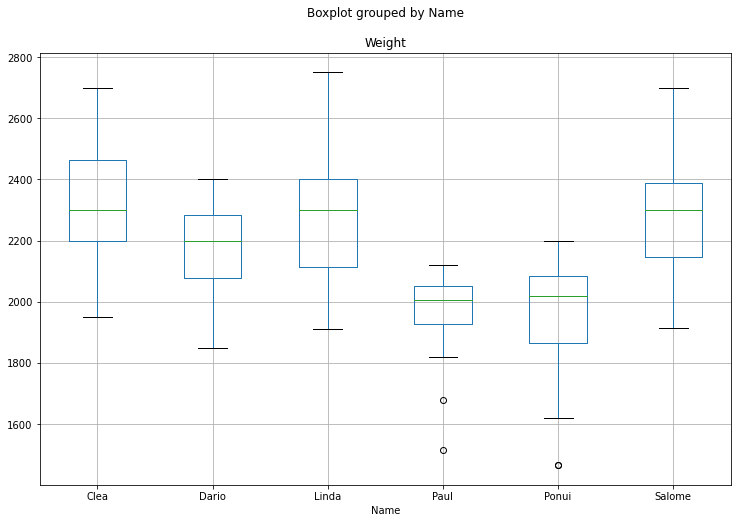

In [298]:
#creating a list of the top 6 names from which to filter the dataframe
top6names = ['Ponui', 'Paul', 'Dario', 'Linda', 'Salome', 'Clea']
#applying a filter to extract the rows that match the above list
filt = df[df['Name'].isin(top6names)]
#extracting just the Name and Weight columns from the filtered df
nameweights = filt[['Name', 'Weight']]
fig, ax = plt.subplots(figsize=(12,8))

nameweights.boxplot(column='Weight', by='Name', ax=ax)

<Axes: title={'center': 'Weight'}, xlabel='Name'>

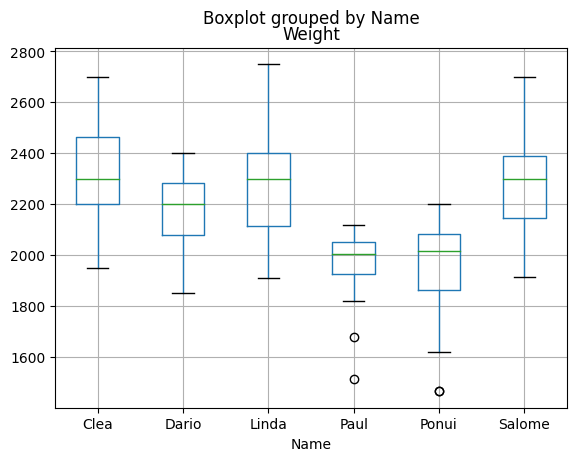

In [244]:
#The following boxplot was also part of the original assignment file and was retained for cross-checking purposes

(3) For the same birds, plot the time series of their weights, with a separate graph for the males and females (2 marks)

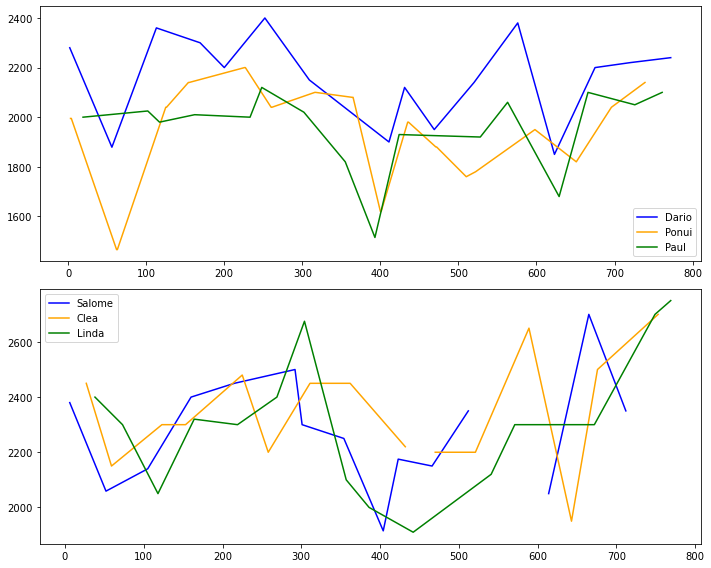

In [299]:
#filtering the df to just the rows with info. corresponding to 'Dario'
dario = filt[filt['Name'] == 'Dario']
#filtering the df to just the rows with info. corresponding to 'Ponui'
ponui = filt[filt['Name'] == 'Ponui']
#filtering the df to just the rows with info. corresponding to 'Paul'
paul = filt[filt['Name'] == 'Paul']

# Creating the first subplot corresponding to the male top 3 birds
plt.figure(figsize=(10, 8))  

plt.subplot(2, 1, 1)  
dario['Weight'].plot(label='Dario', color='blue')
ponui['Weight'].plot(label='Ponui', color='orange')
paul['Weight'].plot(label='Paul', color='green')

plt.legend()

#filtering the df to just the rows with info. corresponding to 'Salome'
salome = filt[filt['Name'] == 'Salome']
#filtering the df to just the rows with info. corresponding to 'Clea'
clea = filt[filt['Name'] == 'Clea']
#filtering the df to just the rows with info. corresponding to 'Linda'
linda = filt[filt['Name'] == 'Linda']

# Creating the second subplot corresponding to the female top 3 birds
plt.subplot(2, 1, 2) 
salome['Weight'].plot(label='Salome', color='blue')
clea['Weight'].plot(label='Clea', color='orange')
linda['Weight'].plot(label='Linda', color='green')

plt.legend()

# Adjusting the layout to not have overlapping labels and titles
plt.tight_layout()

plt.show()



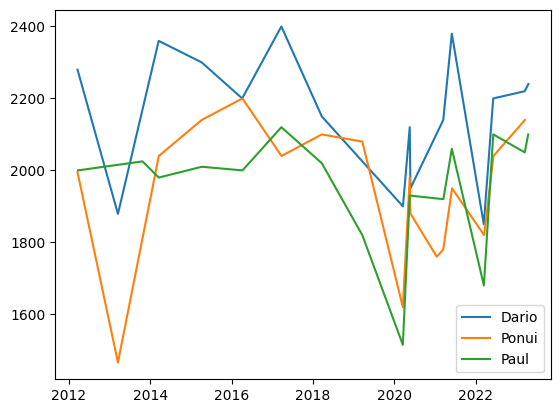

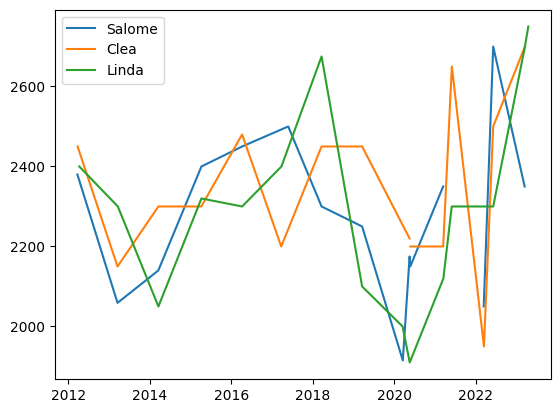

In [245]:
#The following time series graphs were part of the original assignment file and were retained for 
#cross checking purposes
#The slight differences are due to my graphs being more stretched horizontally and the graphs below being more
#squished horizontally

If you look at those graphs, you can see that while the weights vary, they all dropped in 2013/2014 and 2020. The next thing we are going to do is see why that happened, which is drought. 

We'll start by loading a different rain dataset, this one for the rain falling on nearby Waiheke Island:

In [301]:
rain = pd.read_csv('daily_data.csv')
rain.head()

,Station,Date(NZST),Amount,SofG,Deficit,Runoff,Period,Freq
0,1962,20120101:0800,7.2,-,18.6,0.0,24.0,D
1,1962,20120102:0800,2.6,-,20.7,0.0,24.0,D
2,1962,20120103:0800,0.0,-,25.5,0.0,24.0,D
3,1962,20120104:0800,0.8,-,29.4,0.0,24.0,D
4,1962,20120105:0800,3.4,-,30.8,0.0,24.0,D


(4) Split the Date(NZST) column into date and time columns, and tell Pandas that the date column is a date. (2 marks)

In [302]:
#splitting the Date(NZST) column into date and time columns
rain[['Date', 'Time']] = rain['Date(NZST)'].str.split(':', expand=True)

#Telling pandas that the date column is a date
rain['Date'] = pd.to_datetime(rain['Date'], format="%Y%m%d")
rain.head()

,Station,Date(NZST),Amount,SofG,Deficit,Runoff,Period,Freq,Date,Time
0,1962,20120101:0800,7.2,-,18.6,0.0,24.0,D,2012-01-01,0800
1,1962,20120102:0800,2.6,-,20.7,0.0,24.0,D,2012-01-02,0800
2,1962,20120103:0800,0.0,-,25.5,0.0,24.0,D,2012-01-03,0800
3,1962,20120104:0800,0.8,-,29.4,0.0,24.0,D,2012-01-04,0800
4,1962,20120105:0800,3.4,-,30.8,0.0,24.0,D,2012-01-05,0800


In [254]:
#The following output was part of the original assignment file and was retained for cross-checking purposes

,Station,Date(NZST),Amount,SofG,Deficit,Runoff,Period,Freq,Date,Time
0,1962,20120101:0800,7.2,-,18.6,0.0,24.0,D,2012-01-01,0800
1,1962,20120102:0800,2.6,-,20.7,0.0,24.0,D,2012-01-02,0800
2,1962,20120103:0800,0.0,-,25.5,0.0,24.0,D,2012-01-03,0800
3,1962,20120104:0800,0.8,-,29.4,0.0,24.0,D,2012-01-04,0800
4,1962,20120105:0800,3.4,-,30.8,0.0,24.0,D,2012-01-05,0800


It's actually the Deficit that we are interested in to spot drought.

(5) Get the mean average of the Deficit for each year from 2012 to 2023. (4 marks)

I did this in a similar way to question (1): look over the years, finding the rows that match that year (remember that `Date.dt.year` will pull the year out of a date-based column called `Date`), computing the mean of those using `Deficit.mean()` and putting the year and mean value into a Python list, then turning it into a dataframe called `deficit`. I also gave the 2 columns of the new dataframe names using `deficit.columns = ['Year','Deficit']`

There is a plot of the output below.

In [304]:
rainnew = rain.copy()
rainnew['Year'] = rain.Date.dt.year
rainnew.groupby('Year')['Deficit'].mean()


Year
2012.0    49.597541
2013.0    65.045330
2014.0    63.640274
2015.0    68.088462
2016.0    63.700273
2017.0    48.424658
2018.0    49.230137
2019.0    67.554945
2020.0    81.884932
2021.0    64.495604
2022.0    53.056474
2023.0    30.576667
Name: Deficit, dtype: float64

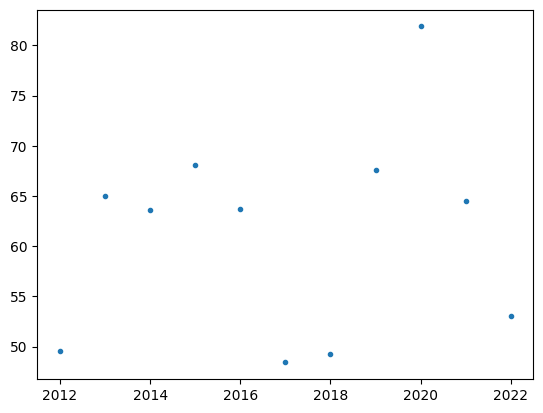

In [249]:
#This plot was provided with the original assignment file and was retained to cross-check that 
#the mean values of deficit for each year from 2012 to 2023 were in alignment with the following plot

pl.plot(deficit.Year,deficit.Deficit,'.')

(6) Compute the correlation coefficient for each of your chosen 6 bird's weight with the deficit. The main measurement that we take is in March, when we catch all the birds to change their transmitters, and conduct health checks, so use the March measurement. Conclude whether or not you agree with me that drought is the reason for the catastrophic weight loss. (4 marks)

I did this by:
* looping over the birds and
    - extracting the rows for that bird and putting them into a new dataframe
    - extracting the rows of the new dataframe where the month was 3 (March) and putting them into another dataframe
    - merging the rainfall dataframe and the new one by matching on the year
    - computing and printing the correlation coefficient

In [305]:
#extracting the rows for Salome where the month was March and putting them into the df 'salomemarch'
#note that the df 'salome' is the same one used in Q3
salomemarch = salome[salome['Date'].dt.month==3]
salomeweight = pd.merge(salomemarch, rainnew, on=["Date"])

#extracting the rows for Clea where the month was March and putting them into the df 'cleamarch'
#note that the df 'clea' is the same one used in Q3
cleamarch = clea[clea['Date'].dt.month==3]
cleaweight = pd.merge(cleamarch, rainnew, on=["Date"])

#extracting the rows for Linda where the month was March and putting them into the df 'lindamarch'
#note that the df 'linda' is the same one used in Q3
lindamarch = linda[linda['Date'].dt.month==3]
lindaweight = pd.merge(lindamarch, rainnew, on=["Date"])
 
#extracting the rows for Dario where the month was March and putting them into the df 'dariomarch'
#note that the df 'dario' is the same one used in Q3    
dariomarch = dario[dario['Date'].dt.month==3]
darioweight = pd.merge(dariomarch, rainnew, on=["Date"])

#extracting the rows for Ponui where the month was March and putting them into the df 'ponuimarch'
#note that the df 'ponui' is the same one used in Q3
ponuimarch = ponui[ponui['Date'].dt.month==3]
ponuiweight = pd.merge(ponuimarch, rainnew, on=["Date"])

#extracting the rows for Paul where the month was March and putting them into the df 'paulmarch'
#note that the df 'paul' is the same one used in Q3
paulmarch = paul[paul['Date'].dt.month==3]
paulweight = pd.merge(paulmarch, rainnew, on=["Date"])


#calculating and printing the correlation coefficients for each of the birds
print("Salome: ", salomeweight['Weight'].corr(salomeweight['Deficit']))
print("Linda: ", lindaweight['Weight'].corr(lindaweight['Deficit']))
print("Clea: ",cleaweight['Weight'].corr(cleaweight['Deficit']))
print("Dario: ",darioweight['Weight'].corr(darioweight['Deficit']))
print("Ponui: ",ponuiweight['Weight'].corr(ponuiweight['Deficit']))
print("Paul: ",paulweight['Weight'].corr(paulweight['Deficit']))



Salome:  -0.7220849536461226
Linda:  -0.6218037610978895
Clea:  -0.5035526773137039
Dario:  -0.7280391466377938
Ponui:  -0.5751621642128667
Paul:  -0.6557812037058349


In [306]:
#tried to merge the two dataframes but the deficit values are off

birdweight = pd.merge(filt, rainnew, on=["Date"])
birdweight.columns
birdweight.groupby('Year')['Deficit'].mean()
birdweight[['Year', 'Deficit']]


,Year,Deficit
0,2012.0,79.7
1,2012.0,79.7
2,2012.0,79.7
3,2012.0,44.4
4,2012.0,5.4
...,...,...
100,2023.0,53.1
101,2023.0,47.4
102,2023.0,48.1
103,2023.0,51.7


In [307]:
#The following code was calculating the correlation coefficients without filtering for the month of March

correlation_coef =birdweight.groupby('Name')['Weight'].corr(birdweight['Deficit'])
print(correlation_coef)

Name
Clea     -0.466991
Dario    -0.526877
Linda    -0.377854
Paul     -0.649832
Ponui    -0.418121
Salome   -0.696987
Name: Weight, dtype: float64


In [256]:
#The following output was provided with the original assignment file and was kept for cross-checking purposes

Dario [[ 1.         -0.46909726]
 [-0.46909726  1.        ]]
Ponui [[ 1.         -0.57054416]
 [-0.57054416  1.        ]]
Salome [[ 1.         -0.60977481]
 [-0.60977481  1.        ]]
Paul [[ 1.         -0.72850921]
 [-0.72850921  1.        ]]
Clea [[ 1.         -0.02447835]
 [-0.02447835  1.        ]]
Linda [[ 1.        -0.8156703]
 [-0.8156703  1.       ]]
